In [62]:
import numpy as np
import pandas as pd
import itertools
from typing import List, Optional
import matplotlib.pyplot as plt


# Data load

In [63]:
df = pd.read_csv('study.csv')
df

,individual,Ng10.a,Ng10.b,Ng18.a,Ng18.b,Ng8.a,Ng8.b,Bd12.a,Bd12.b,Ng20.a,...,stem_width,stem_height,first_flower_day,fruits_number,fruit_length,fruit_diameter,fruit_weight,seeds_number,yield,variety
0,ind_1,1,1,4,4,2,2,2,2,1,...,1.52,78.0,44.0,13,23.18,3.39,48.08,135.00,624.98,cayenne
1,ind_2,1,1,4,4,2,2,2,2,1,...,1.36,74.0,45.0,9,25.05,3.08,48.10,164.00,432.90,cayenne
2,ind_3,1,1,3,3,2,2,2,2,1,...,1.43,69.0,63.0,8,17.75,2.03,19.05,47.00,152.40,cayenne
3,ind_4,1,1,4,4,2,2,2,2,1,...,1.53,68.0,44.0,12,21.50,3.04,46.58,156.00,558.90,cayenne
4,ind_5,1,1,4,4,2,2,2,2,1,...,1.34,84.0,44.0,6,24.88,3.38,54.05,148.33,324.30,cayenne
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,ind_110,2,2,2,2,1,1,2,2,1,...,1.29,45.0,83.0,0,3.69,2.59,8.25,51.64,0.00,habanero
110,ind_111,2,2,2,2,1,1,0,0,1,...,0.77,33.0,57.0,0,3.69,2.59,8.25,51.64,0.00,habanero
111,ind_112,2,2,2,2,1,1,1,1,1,...,1.52,59.0,69.0,0,3.69,2.59,8.25,51.64,0.00,habanero
112,ind_113,2,2,2,2,1,1,1,1,1,...,1.04,37.5,52.0,10,3.29,2.53,6.70,49.00,67.00,habanero


# Data split by type

## Genotypes

In [64]:
gen = df.iloc[:, 0:15].astype(str)
gen.head()

,individual,Ng10.a,Ng10.b,Ng18.a,Ng18.b,Ng8.a,Ng8.b,Bd12.a,Bd12.b,Ng20.a,Ng20.b,Ng6.a,Ng6.b,Ng7.a,Ng7.b
0,ind_1,1,1,4,4,2,2,2,2,1,1,2,2,0,0
1,ind_2,1,1,4,4,2,2,2,2,1,1,2,2,0,0
2,ind_3,1,1,3,3,2,2,2,2,1,1,2,2,2,2
3,ind_4,1,1,4,4,2,2,2,2,1,1,2,2,2,2
4,ind_5,1,1,4,4,2,2,2,2,1,1,2,2,2,2


In [65]:
gen.dtypes

individual    object
Ng10.a        object
Ng10.b        object
Ng18.a        object
Ng18.b        object
Ng8.a         object
Ng8.b         object
Bd12.a        object
Bd12.b        object
Ng20.a        object
Ng20.b        object
Ng6.a         object
Ng6.b         object
Ng7.a         object
Ng7.b         object
dtype: object

## Morphological traits

In [66]:
mor = pd.concat([df.iloc[:, [0]], df.iloc[:, 15:-1]], axis=1)
mor.head()

,individual,stem_width,stem_height,first_flower_day,fruits_number,fruit_length,fruit_diameter,fruit_weight,seeds_number,yield
0,ind_1,1.52,78.0,44.0,13,23.18,3.39,48.08,135.00,624.98
1,ind_2,1.36,74.0,45.0,9,25.05,3.08,48.10,164.00,432.90
2,ind_3,1.43,69.0,63.0,8,17.75,2.03,19.05,47.00,152.40
3,ind_4,1.53,68.0,44.0,12,21.50,3.04,46.58,156.00,558.90
4,ind_5,1.34,84.0,44.0,6,24.88,3.38,54.05,148.33,324.30


In [67]:
mor.dtypes

individual           object
stem_width          float64
stem_height         float64
first_flower_day    float64
fruits_number         int64
fruit_length        float64
fruit_diameter      float64
fruit_weight        float64
seeds_number        float64
yield               float64
dtype: object

In [68]:
mor.to_csv('mor.csv', index = None)

In [59]:
def combine_pairs(df):
    """
    Combines columns ending in .a and .b into a new DataFrame,
    and adds the 'individual' column at the beginning.
    """
    # Detect base names (without .a / .b)
    bases = sorted({col[:-2] for col in df.columns if col.endswith(('.a', '.b'))})

    new_df = pd.DataFrame()

    # Add 'individual' column at the start
    if 'individual' in df.columns:
        new_df['individual'] = df['individual']
    else:
        raise ValueError("The DataFrame does not contain an 'individual' column.")

    # Combine pairs
    for base in bases:
        col_a = base + ".a"
        col_b = base + ".b"
        new_df[base] = df[col_a].astype(str) + "/" + df[col_b].astype(str)

    return new_df

In [60]:
gen2 = combine_pairs(gen)

In [61]:
gen2

,individual,Bd12,Ng10,Ng18,Ng20,Ng6,Ng7,Ng8
0,ind_1,2/2,1/1,4/4,1/1,2/2,0/0,2/2
1,ind_2,2/2,1/1,4/4,1/1,2/2,0/0,2/2
2,ind_3,2/2,1/1,3/3,1/1,2/2,2/2,2/2
3,ind_4,2/2,1/1,4/4,1/1,2/2,2/2,2/2
4,ind_5,2/2,1/1,4/4,1/1,2/2,2/2,2/2
...,...,...,...,...,...,...,...,...
109,ind_110,2/2,2/2,2/2,1/1,1/1,3/3,1/1
110,ind_111,0/0,2/2,2/2,1/1,1/1,3/3,1/1
111,ind_112,1/1,2/2,2/2,1/1,1/1,3/3,1/1
112,ind_113,1/1,2/2,2/2,1/1,1/1,3/3,1/1


In [52]:
gen2.to_csv('gen.csv', index = False )

In [12]:
import pandas as pd
import itertools

def pairwise_row_matches(df):
    results = []
    row_pairs = list(itertools.combinations(range(len(df)), 2))

    for i, j in row_pairs:
        row_i = df.iloc[i].astype(str)
        row_j = df.iloc[j].astype(str)

        total_matches = 0

        for col in df.columns:
            # Split by slash → ['2'/'2'], ['2'/'3'], etc.
            elems_i = row_i[col].split("/")
            elems_j = row_j[col].split("/")

            # Count element-wise matches (pairwise position)
            matches = sum(a == b for a, b in zip(elems_i, elems_j))
            total_matches += matches

        results.append({
            "pair": f"{i+1}_{j+1}",
            "Matches": total_matches
        })
    
    return pd.DataFrame(results)

In [13]:
# df_gen debe existir previamente en tu entorno

def pairwise_relatedness(df: pd.DataFrame = None, decimals: int = 4) -> pd.DataFrame:
    """
    For every pair of rows in df, compute relatedness = matches / total_possible_elements.
    Returns a DataFrame named r with columns: pair, relatedness.
    Also creates the global object r.

    Now:
    - If df is None, uses df_gen by default.
    """

    # Default to df_gen if no df was passed
    global df_gen
    if df is None:
        df = df_gen

    def split_cell(cell: object) -> list:
        if pd.isna(cell):
            return []
        s = str(cell).strip()
        if s == "":
            return []
        return [elem.strip() for elem in s.split(",")]

    results = []
    nrows = len(df)
    row_pairs = list(itertools.combinations(range(nrows), 2))

    # Pre-split cache
    split_cache = {
        r_i: {col: split_cell(df.iloc[r_i][col]) for col in df.columns}
        for r_i in range(nrows)
    }

    for i, j in row_pairs:
        total_matches = 0
        total_possible = 0

        for col in df.columns:
            elems_i = split_cache[i][col]
            elems_j = split_cache[j][col]

            max_len = max(len(elems_i), len(elems_j))
            total_possible += max_len

            for k in range(max_len):
                a = elems_i[k] if k < len(elems_i) else None
                b = elems_j[k] if k < len(elems_j) else None
                if a is not None and b is not None and a == b:
                    total_matches += 1

        relatedness = (total_matches / total_possible) if total_possible > 0 else 0.0
        results.append({
            "pair": f"{i+1}_{j+1}",
            "relatedness": round(relatedness, decimals)
        })

    # Export global r
    global r
    r = pd.DataFrame(results)
    print("Pairwise relatedness:")
    return r


In [14]:
df_gen = df
pairwise_relatedness()

Pairwise relatedness:


,pair,relatedness
0,1_2,0.9333
1,1_3,0.6667
2,1_4,0.8000
3,1_5,0.8000
4,1_6,0.6667
...,...,...
6436,111_113,0.8000
6437,111_114,0.6667
6438,112_113,0.9333
6439,112_114,0.6667


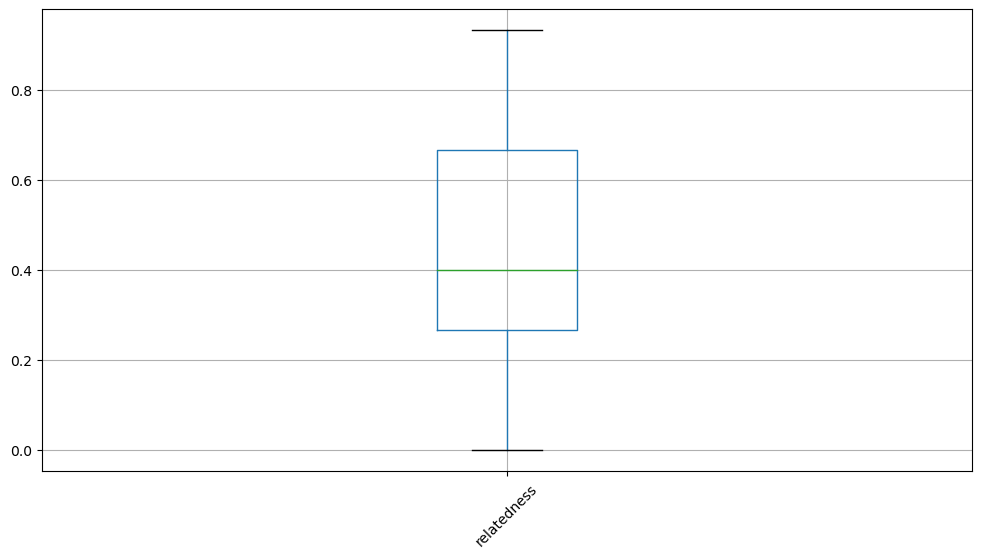

In [15]:
r.boxplot(figsize=(12, 6))
plt.xticks(rotation=45)
plt.show()

In [16]:
mor.head()

,individual,stem_width,stem_height,first_flower_day,fruits_number,fruit_length,fruit_diameter,fruit_weight,seeds_number,yield
0,1,1.52,78.0,44.0,13,23.18,3.39,48.08,135.00,624.98
1,2,1.36,74.0,45.0,9,25.05,3.08,48.10,164.00,432.90
2,3,1.43,69.0,63.0,8,17.75,2.03,19.05,47.00,152.40
3,4,1.53,68.0,44.0,12,21.50,3.04,46.58,156.00,558.90
4,5,1.34,84.0,44.0,6,24.88,3.38,54.05,148.33,324.30


In [17]:
def phenotypic_similarity_safe(
    df: pd.DataFrame,
    trait_cols: Optional[List[str]] = None,
    decimals: int = 4,
    ddof: int = 0
) -> pd.DataFrame:
    """
    Robust phenotypic similarity per trait for each pair of rows.

    For each trait column k and pair of individuals i,j the function computes:
        similarity_k = (x_i_k - mean_k) * (x_j_k - mean_k) / var_k

    - If trait_cols is None, numeric columns (except 'individual') are used.
    - Means and variances are computed per column. var uses ddof (default ddof=0, population variance).
    - If var_k == 0 (or NaN) the similarity for that trait is set to 0 to avoid division by zero.
    - If either value is NaN, the similarity for that trait is NaN.
    - Returns a DataFrame with rows for each pair "i_j" (1-based) and a column per trait.
    """
    # Defensive copy of column names
    cols = list(df.columns)

    # Validate explicit trait_cols if provided
    if trait_cols is not None:
        if not isinstance(trait_cols, (list, tuple)):
            raise TypeError("trait_cols must be a list/tuple of column names or None.")
        missing = [c for c in trait_cols if c not in cols]
        if missing:
            raise KeyError(f"The following requested columns do not exist in the DataFrame: {missing}")
        non_numeric = [c for c in trait_cols if not pd.api.types.is_numeric_dtype(df[c])]
        if non_numeric:
            raise TypeError(f"The following columns are not numeric: {non_numeric}")
        selected_traits = list(trait_cols)
    else:
        # auto-select numeric columns excluding 'individual' if present
        selected_traits = [c for c in cols if c != 'individual' and pd.api.types.is_numeric_dtype(df[c])]

    if not selected_traits:
        numeric_cols = [c for c in cols if pd.api.types.is_numeric_dtype(df[c])]
        raise ValueError(
            "No selectable traits found (selected_traits is empty). "
            f"Numeric columns in df: {numeric_cols}. "
            "If you want to include non-numeric columns, convert them first and pass via trait_cols."
        )

    # Compute column means and variances
    means = df[selected_traits].mean()
    vars_ = df[selected_traits].var(ddof=ddof)

    results = []
    nrows = len(df)
    for i, j in itertools.combinations(range(nrows), 2):
        row = {"pair": f"{i+1}_{j+1}"}
        for col in selected_traits:
            xi = df.iloc[i][col]
            xj = df.iloc[j][col]
            var_col = vars_.loc[col]
            # handle NaNs
            if pd.isna(xi) or pd.isna(xj):
                sim = float("nan")
            elif var_col == 0 or pd.isna(var_col):
                sim = 0.0
            else:
                sim = ((xi - means.loc[col]) * (xj - means.loc[col])) / var_col
            row[col] = round(sim, decimals) if pd.notna(sim) else sim
        results.append(row)

    return pd.DataFrame(results)


In [18]:
phesim = phenotypic_similarity_safe(mor)

In [19]:
phesim

,pair,stem_width,stem_height,first_flower_day,fruits_number,fruit_length,fruit_diameter,fruit_weight,seeds_number,yield
0,1_2,0.2125,-0.0011,0.9711,0.3226,2.2137,1.3029,2.2562,1.7102,0.1541
1,1_3,0.1792,-0.0025,-0.8682,0.3244,1.1282,-0.1534,0.0577,-0.6254,-0.4948
2,1_4,0.1316,-0.0028,1.0733,0.3170,1.6858,1.2474,2.1412,1.5505,0.4456
3,1_5,0.2220,0.0018,1.0733,0.3282,2.1884,1.7190,2.7065,1.3974,-0.0971
4,1_6,0.2315,-0.0017,1.0733,0.3319,2.2806,1.1642,2.8390,1.3684,-0.3310
...,...,...,...,...,...,...,...,...,...,...
6436,111_113,1.3175,2.3605,-0.0608,0.3452,0.5082,0.1943,0.2955,0.2757,0.9804
6437,111_114,1.9188,3.5032,0.4007,0.3632,0.4350,0.3240,0.2267,0.2099,1.1690
6438,112_113,0.3646,0.9900,-0.3531,0.3452,0.5082,0.1943,0.2955,0.2757,0.9804
6439,112_114,0.5309,1.4693,2.3266,0.3632,0.4350,0.3240,0.2267,0.2099,1.1690


In [20]:
phesim.describe()

,stem_width,stem_height,first_flower_day,fruits_number,fruit_length,fruit_diameter,fruit_weight,seeds_number,yield
count,6441.000000,6441.00000,6441.000000,6441.000000,6441.000000,6441.000000,6441.000000,6441.000000,6441.000000
mean,-0.008850,-0.00885,-0.008849,-0.008850,-0.008850,-0.008849,-0.008849,-0.008844,-0.008849
std,0.987477,0.99355,0.987037,0.984086,0.997299,0.997622,0.996196,0.996346,0.992755
min,-5.464600,-5.25840,-6.210000,-2.131100,-1.550900,-2.413000,-1.746000,-2.509400,-3.471800
25%,-0.373400,-0.41220,-0.314400,-0.672300,-0.945500,-0.713700,-0.863500,-0.868000,-0.579000
50%,0.057200,-0.00170,-0.002400,0.304200,0.465900,0.089500,0.188600,0.140200,-0.002900
75%,0.338300,0.39280,0.348200,0.341500,0.551800,0.568800,0.519700,0.601100,0.616200
max,9.057600,5.56080,9.899500,11.819600,3.399500,2.225400,3.807000,4.120000,7.853900


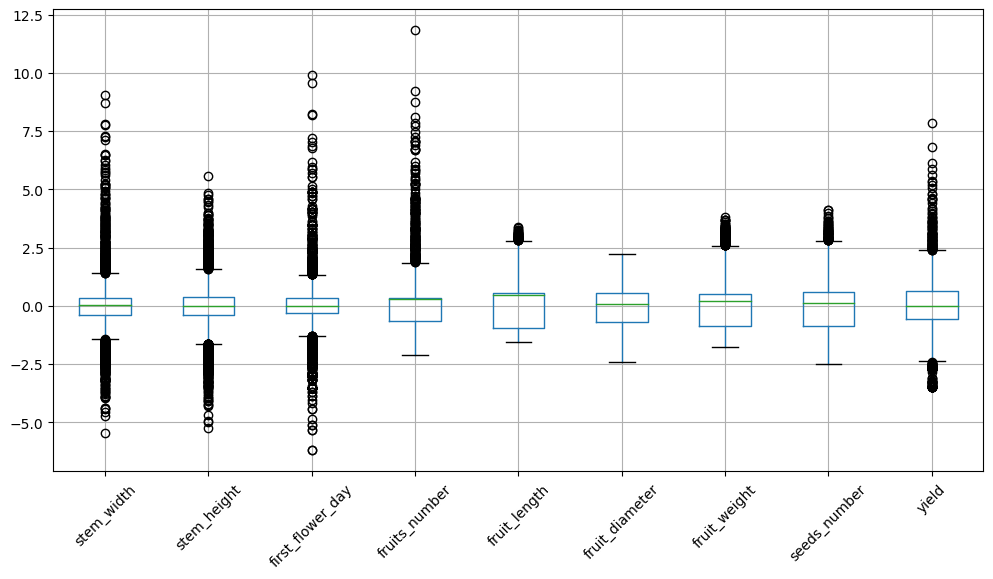

In [21]:
import matplotlib.pyplot as plt

phesim.boxplot(figsize=(12, 6))
plt.xticks(rotation=45)
plt.show()

In [22]:
def phenotypic_similarity(
    df: Optional[pd.DataFrame] = None,
    trait_cols: Optional[List[str]] = None,
    decimals: int = 4,
) -> pd.DataFrame:
    """
    Compute bounded phenotypic similarity in [0,1] for each trait and each pair of rows,
    using R_k = max_k - min_k (range) for normalization.

    similarity_k(i,j) = (R_k - abs(x_i - x_j)) / R_k

    Behavior:
    - If df is None, the function will try to use a global DataFrame named `mor`.
      If `mor` is not found, a ValueError is raised.
    - If trait_cols is None, numeric columns are auto-selected except column named 'individual' if present.
    - If R_k == 0 (all values identical) similarity is set to 1 for that trait.
    - If either x_i or x_j is NaN → similarity is NaN for that trait.
    - Output: DataFrame with "pair" column (1-based indices "i_j") and one column per trait.
    - Final DataFrame is assigned to the global variable `z` and also returned.

    Parameters
    ----------
    df : pd.DataFrame or None
        Input dataframe containing phenotypic trait columns. If None, uses global `mor`.
    trait_cols : list[str] | None
        List of trait column names to use. If None, auto-select numeric columns (excluding 'individual').
    decimals : int
        Number of decimals to round similarity values.

    Returns
    -------
    pd.DataFrame
        DataFrame named `z` with columns: 'pair' and one column per selected trait.
    """
    # fallback to global 'mor' if df not provided
    if df is None:
        if 'mor' not in globals():
            raise ValueError("df not provided and no global DataFrame named 'mor' found. Please pass df or create 'mor'.")
        df = globals()['mor']

    cols = list(df.columns)

    # select traits
    if trait_cols is not None:
        if not isinstance(trait_cols, (list, tuple)):
            raise TypeError("trait_cols must be a list/tuple of column names or None.")
        missing = [c for c in trait_cols if c not in cols]
        if missing:
            raise KeyError(f"The following requested columns do not exist in the DataFrame: {missing}")
        non_numeric = [c for c in trait_cols if not pd.api.types.is_numeric_dtype(df[c])]
        if non_numeric:
            raise TypeError(f"The following columns are not numeric: {non_numeric}")
        selected_traits = list(trait_cols)
    else:
        selected_traits = [c for c in cols if c != "individual" and pd.api.types.is_numeric_dtype(df[c])]

    if not selected_traits:
        numeric_cols = [c for c in cols if pd.api.types.is_numeric_dtype(df[c])]
        raise ValueError(
            "No selectable traits found (selected_traits is empty). "
            f"Numeric columns in df: {numeric_cols}."
        )

    # compute ranges = max - min (force range method)
    ranges = df[selected_traits].max() - df[selected_traits].min()
    ranges = ranges[selected_traits]  # ensure same order/index

    results = []
    nrows = len(df)

    for i, j in itertools.combinations(range(nrows), 2):
        row = {"pair": f"{i+1}_{j+1}"}
        for col in selected_traits:
            xi = df.iloc[i][col]
            xj = df.iloc[j][col]
            R = ranges.loc[col]

            if pd.isna(xi) or pd.isna(xj):
                sim = float("nan")
            else:
                diff = abs(xi - xj)
                if pd.isna(R) or R == 0:
                    sim = 1.0
                else:
                    sim = (R - diff) / R
                    # clip to [0,1]
                    if sim < 0:
                        sim = 0.0
                    elif sim > 1:
                        sim = 1.0

            row[col] = round(sim, decimals) if pd.notna(sim) else sim

        results.append(row)

    # create and export global z
    global z
    z = pd.DataFrame(results)
    print('Phenotypic similarity:')
    return z


In [23]:
phenotypic_similarity()

Phenotypic similarity:


,pair,stem_width,stem_height,first_flower_day,fruits_number,fruit_length,fruit_diameter,fruit_weight,seeds_number,yield
0,1_2,0.9584,0.9685,0.9811,0.9968,0.9259,0.8949,0.9996,0.8360,0.8653
1,1_3,0.9766,0.9291,0.6415,0.9960,0.7849,0.5390,0.4864,0.5023,0.6686
2,1_4,0.9974,0.9213,1.0000,0.9992,0.9334,0.8814,0.9735,0.8812,0.9537
3,1_5,0.9532,0.9528,1.0000,0.9944,0.9326,0.9966,0.8944,0.9246,0.7892
4,1_6,0.9481,0.9528,1.0000,0.9928,0.9081,0.8610,0.8634,0.9328,0.7183
...,...,...,...,...,...,...,...,...,...,...
6436,111_113,0.9299,0.9646,0.9057,0.9920,0.9842,0.9797,0.9726,0.9851,0.9530
6437,111_114,0.9792,0.8819,0.7358,0.9992,0.9766,0.9322,0.9797,0.9753,0.9934
6438,112_113,0.8753,0.8307,0.6792,0.9920,0.9842,0.9797,0.9726,0.9851,0.9530
6439,112_114,0.7844,0.6772,0.9623,0.9992,0.9766,0.9322,0.9797,0.9753,0.9934


In [24]:
z

,pair,stem_width,stem_height,first_flower_day,fruits_number,fruit_length,fruit_diameter,fruit_weight,seeds_number,yield
0,1_2,0.9584,0.9685,0.9811,0.9968,0.9259,0.8949,0.9996,0.8360,0.8653
1,1_3,0.9766,0.9291,0.6415,0.9960,0.7849,0.5390,0.4864,0.5023,0.6686
2,1_4,0.9974,0.9213,1.0000,0.9992,0.9334,0.8814,0.9735,0.8812,0.9537
3,1_5,0.9532,0.9528,1.0000,0.9944,0.9326,0.9966,0.8944,0.9246,0.7892
4,1_6,0.9481,0.9528,1.0000,0.9928,0.9081,0.8610,0.8634,0.9328,0.7183
...,...,...,...,...,...,...,...,...,...,...
6436,111_113,0.9299,0.9646,0.9057,0.9920,0.9842,0.9797,0.9726,0.9851,0.9530
6437,111_114,0.9792,0.8819,0.7358,0.9992,0.9766,0.9322,0.9797,0.9753,0.9934
6438,112_113,0.8753,0.8307,0.6792,0.9920,0.9842,0.9797,0.9726,0.9851,0.9530
6439,112_114,0.7844,0.6772,0.9623,0.9992,0.9766,0.9322,0.9797,0.9753,0.9934


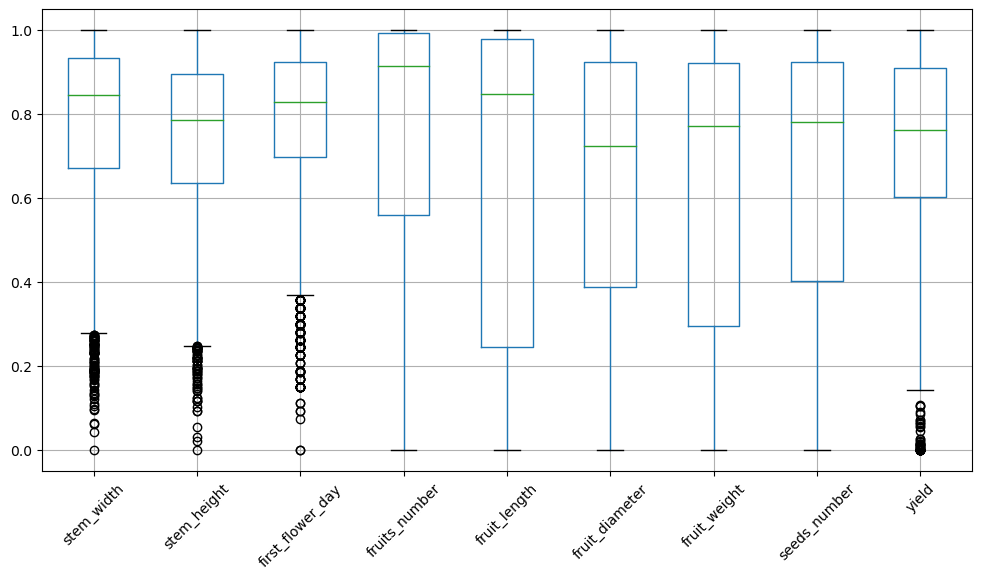

In [25]:
z.boxplot(figsize=(12, 6))
plt.xticks(rotation=45)
plt.show()

# Inbreeding F

In [26]:
gen2

,individual,Bd12,Ng10,Ng18,Ng20,Ng6,Ng7,Ng8
0,1,"2,2","1,1","4,4","1,1","2,2","0,0","2,2"
1,2,"2,2","1,1","4,4","1,1","2,2","0,0","2,2"
2,3,"2,2","1,1","3,3","1,1","2,2","2,2","2,2"
3,4,"2,2","1,1","4,4","1,1","2,2","2,2","2,2"
4,5,"2,2","1,1","4,4","1,1","2,2","2,2","2,2"
...,...,...,...,...,...,...,...,...
109,110,"2,2","2,2","2,2","1,1","1,1","3,3","1,1"
110,111,"0,0","2,2","2,2","1,1","1,1","3,3","1,1"
111,112,"1,1","2,2","2,2","1,1","1,1","3,3","1,1"
112,113,"1,1","2,2","2,2","1,1","1,1","3,3","1,1"


In [27]:
def heterozygosity(df, ignore_cols=('individual',), count_nans_as_invalid=True):
    """
    Computes observed and expected heterozygosity per column and the inbreeding
    coefficient F.

    - Returns: DataFrame with rows ['observed_heterozygosity', 'expected_heterozygosity']
              and a column 'average' (mean across loci).
    - Creates a global variable `F` (inbreeding coefficient).
    - Creates a global variable `heterozygosity_table` containing the final table.
    - Prints only the value of F.

    Notes:
      - NaN cells are excluded from per-column denominators by default. Set
        count_nans_as_invalid=False to include NaNs as invalid entries
        (denominator = total rows).
    """
    cols = [c for c in df.columns if c not in ignore_cols]

    observed = {}
    expected = {}

    for col in cols:
        series_raw = df[col]

        # handle missing values
        if count_nans_as_invalid:
            series = series_raw.dropna().astype(str)
        else:
            series = series_raw.fillna('').astype(str)

        total = len(series)
        if total == 0:
            observed[col] = np.nan
            expected[col] = np.nan
            continue

        # observed heterozygosity (Ho): left != right
        def is_hetero(cell):
            if ',' not in cell:
                return False
            L, R = cell.split(',', 1)
            return L.strip() != R.strip()

        Ho = series.map(is_hetero).sum() / total
        observed[col] = Ho

        # expected heterozygosity (He): 1 - sum(freq(homo)^2)
        def is_homo(cell):
            if ',' not in cell:
                return False
            L, R = cell.split(',', 1)
            return L.strip() == R.strip()

        homozygotes = series[series.map(is_homo)]
        counts = homozygotes.value_counts()
        freqs = counts / total
        He = 1 - np.sum(freqs ** 2)
        expected[col] = He

    # build result table
    result = pd.DataFrame(
        [observed, expected],
        index=["observed_heterozygosity", "expected_heterozygosity"]
    )
    result["average"] = result.mean(axis=1)

    # compute global averages and F
    Ho_avg = result.loc["observed_heterozygosity", cols].mean()
    He_avg = result.loc["expected_heterozygosity", cols].mean()
    F_value = 1 - (Ho_avg / He_avg) if (He_avg is not None and not np.isnan(He_avg) and He_avg != 0) else np.nan

    # create global variable F
    globals()['F'] = F_value

    # create global variable heterozygosity_table
    globals()['heterozygosity_table'] = result

    # print only F
    print("Inbreeding coefficient F:", F_value)

    return result


In [28]:
heterozygosity(gen2)

Inbreeding coefficient F: 1.0


,Bd12,Ng10,Ng18,Ng20,Ng6,Ng7,Ng8,average
observed_heterozygosity,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
expected_heterozygosity,0.576947,0.485534,0.738381,0.034626,0.685749,0.743921,0.466759,0.533131


In [29]:
F

1.0

In [30]:
heterozygosity_table

,Bd12,Ng10,Ng18,Ng20,Ng6,Ng7,Ng8,average
observed_heterozygosity,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
expected_heterozygosity,0.576947,0.485534,0.738381,0.034626,0.685749,0.743921,0.466759,0.533131


# Heritability

In [31]:
def heritability(
    r_df: Optional[pd.DataFrame] = None,
    z_df: Optional[pd.DataFrame] = None,
    r_col: str = "relatedness",
    key: str = "pair",
    F: Optional[float] = None,
    ddof: int = 0,
    n_bootstrap: int = 1000,
    ci: float = 0.95,
    random_state: Optional[int] = None
) -> pd.DataFrame:
    """
    Computes per-trait heritability with bootstrap standard errors and confidence intervals.

    Behavior:
      - If r_df is None, tries to use global variable `r`.
      - If z_df is None, tries to use global variable `z`.
      - If F is None, tries to use global variable `F`.
      - Raises ValueError with clear message if any required input is missing.

    Returns a DataFrame with columns:
      - trait
      - heritability (point estimate)
      - standard_error (bootstrap SE)
      - ci_lower (bootstrap percentile CI)
      - ci_upper
    Also assigns the returned DataFrame to global `heritability_table`.
    """

    # --- fallback to globals if not provided ---
    if r_df is None:
        if 'r' in globals():
            r_df = globals()['r']
        else:
            raise ValueError("r_df not provided and no global 'r' found. Please pass r_df or create global 'r'.")

    if z_df is None:
        if 'z' in globals():
            z_df = globals()['z']
        else:
            raise ValueError("z_df not provided and no global 'z' found. Please pass z_df or create global 'z'.")

    if F is None:
        if 'F' in globals():
            F = globals()['F']
        else:
            raise ValueError("F not provided and no global 'F' found. Please pass F or run heterozygosity() first.")
    F = float(F)

    # ------------ Merge ----------------------
    merged = pd.merge(r_df[[key, r_col]], z_df, on=key, how="inner")
    if merged.empty:
        raise ValueError("Merge resulted in empty dataframe. Check keys in r_df and z_df.")

    n_pairs = merged.shape[0]

    # ------------ Extract and validate r ------
    r = pd.to_numeric(merged[r_col], errors="coerce")
    if r.isna().any():
        raise ValueError(f"Non-numeric values found in relatedness column '{r_col}'.")

    var_r = r.var(ddof=ddof)
    if var_r == 0 or np.isclose(var_r, 0):
        raise ValueError("Variance of relatedness is zero; cannot compute heritability.")

    # ------------ Trait columns ---------------
    trait_cols = [c for c in merged.columns if c not in {key, r_col}]
    if not trait_cols:
        raise ValueError("No trait columns found after merging r_df and z_df.")

    # ------------ Center data -----------------
    r_centered = r - r.mean()
    z = merged[trait_cols].apply(pd.to_numeric, errors="coerce")
    if z.isna().any().any():
        raise ValueError("Non-numeric values detected in trait columns after conversion.")
    z_centered = z - z.mean()

    # ------------ Point estimates --------------
    covariances = (r_centered.values.reshape(-1, 1) * z_centered.values).mean(axis=0)
    h2_unadjusted = covariances / (2.0 * var_r)
    h2_point = h2_unadjusted * (1.0 + F)

    # ------------ Bootstrap --------------------
    rng = np.random.default_rng(random_state)
    B = int(n_bootstrap)
    boot_estimates = np.full((B, len(trait_cols)), np.nan)

    for b in range(B):
        idx = rng.integers(0, n_pairs, size=n_pairs)
        r_s = r.values[idx]
        z_s = z.values[idx, :]

        var_r_s = np.var(r_s, ddof=ddof)
        if var_r_s == 0 or np.isclose(var_r_s, 0):
            # skip this bootstrap replicate (invalid)
            continue

        r_s_centered = r_s - r_s.mean()
        z_s_centered = z_s - z_s.mean(axis=0)

        cov_s = (r_s_centered.reshape(-1, 1) * z_s_centered).mean(axis=0)
        h2_unadj_s = cov_s / (2.0 * var_r_s)
        h2_s = h2_unadj_s * (1.0 + F)

        boot_estimates[b, :] = h2_s

    # Remove invalid bootstrap iterations
    valid = ~np.all(np.isnan(boot_estimates), axis=1)
    boot_valid = boot_estimates[valid]

    if boot_valid.shape[0] == 0:
        raise RuntimeError("All bootstrap replicates invalid (variance of r was zero in all replicates).")

    # ------------ Standard errors + CI ---------
    se = np.nanstd(boot_valid, axis=0, ddof=1)

    alpha = (1 - ci) / 2
    ci_lower = np.nanpercentile(boot_valid, 100 * alpha, axis=0)
    ci_upper = np.nanpercentile(boot_valid, 100 * (1 - alpha), axis=0)

    # ------------ Final output -----------------
    out = pd.DataFrame({
        "trait": trait_cols,
        "heritability": h2_point,
        "standard_error": se,
        "ci_lower": ci_lower,
        "ci_upper": ci_upper
    })

    # assign to global convenience variable
    globals()['heritability_table'] = out[["trait", "heritability", "standard_error", "ci_lower", "ci_upper"]]

    return globals()['heritability_table']


In [32]:
heritability()

,trait,heritability,standard_error,ci_lower,ci_upper
0,stem_width,0.097572,0.007986,0.081955,0.113448
1,stem_height,0.158912,0.007383,0.144935,0.173115
2,first_flower_day,0.214829,0.007898,0.199349,0.230742
3,fruits_number,0.148619,0.011444,0.125258,0.171933
4,fruit_length,1.000983,0.009147,0.983326,1.019026
5,fruit_diameter,0.475356,0.011271,0.451985,0.497163
6,fruit_weight,0.846530,0.009329,0.828000,0.864462
7,seeds_number,0.688304,0.008758,0.671112,0.705753
8,yield,0.204336,0.009473,0.185323,0.222907
